# First training loop

## Reproducing loss functions

Try to recompute those losses using simple operations.

They usually use log probas or logits to avoid overflows or floating point errors.

In [1]:
import torch
from torch import nn

log_loss = nn.NLLLoss()
cross_entropy = nn.CrossEntropyLoss()
binary_cross_entropy = nn.BCELoss()

In [2]:
# bit.ly/ens-dl for code

torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [3]:
p = torch.rand(3)
q = torch.rand(3)
p

tensor([0.2929, 0.1388, 0.5391])

In [4]:
p /= p.sum()
q /= q.sum()
p

tensor([0.3017, 0.1430, 0.5553])

In [5]:
cross_entropy(torch.log(p), q)

tensor(0.9843)

In [6]:
-(q * torch.log(p)).sum()

tensor(0.9843)

In [7]:
# Trigger documentation in Jupyter
??cross_entropy

In [8]:
import sklearn
sklearn.__version__

'1.1.3'

## Loading a handwritten digits dataset

In [9]:
from sklearn.datasets import fetch_lfw_people, load_digits

dataset = load_digits()
# dataset = fetch_lfw_people()  # We didn't talk about this
images = dataset['images']
X_numpy = dataset['data']
y_numpy = dataset['target']
X = torch.Tensor(X_numpy)
y = torch.LongTensor(y_numpy)
X.shape

torch.Size([1797, 64])

tensor(0)

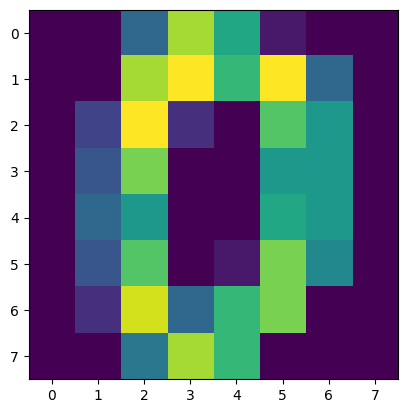

In [10]:
import matplotlib.pyplot as plt

plt.imshow(images[0])  # Displaying the first image
y[0]  # And its label

In [11]:
dataset = torch.utils.data.TensorDataset(X, y)
training_set = torch.utils.data.DataLoader(dataset, batch_size=50)

In [12]:
model = nn.Sequential(
    nn.Linear(64, 10),
    # nn.ReLU(),
    # nn.Linear(1000, 10),
    # nn.Softmax()
)
model.named_parameters

<bound method Module.named_parameters of Sequential(
  (0): Linear(in_features=64, out_features=10, bias=True)
)>

In [13]:
for name, x in model.named_parameters():
    print(name, x.shape)

0.weight torch.Size([10, 64])
0.bias torch.Size([10])


In [14]:
outputs = model(X[0])
outputs  # Output on first image

tensor([ 1.8074e+00,  1.9146e-03,  7.9650e+00, -7.0714e-01,  7.2309e+00,
        -4.3531e+00,  1.9761e+00,  5.4649e+00, -3.3136e+00, -4.8939e+00],
       grad_fn=<AddBackward0>)

In [15]:
outputs = model(X[0:5])
outputs  # Output on first batch

tensor([[ 1.8074e+00,  1.9147e-03,  7.9650e+00, -7.0714e-01,  7.2309e+00,
         -4.3531e+00,  1.9761e+00,  5.4649e+00, -3.3136e+00, -4.8939e+00],
        [-1.9519e+00, -1.3623e+00,  4.4822e+00,  2.5194e+00,  2.8531e+00,
         -1.8792e+00, -5.9288e+00,  5.1487e+00,  4.5339e+00, -7.5390e+00],
        [-9.5236e-01, -2.4883e+00,  4.8792e+00,  3.3836e+00,  2.0671e+00,
         -7.8852e-01, -3.4606e+00,  5.8192e+00,  5.0477e-01, -6.0465e+00],
        [ 2.5825e+00,  6.4857e-01,  6.7395e+00,  1.3505e+00,  8.6369e+00,
         -1.2467e+00, -2.8729e+00,  4.5814e+00, -4.0381e-01, -8.3774e+00],
        [-2.2492e+00,  2.4008e+00,  4.4589e+00,  1.3562e+00, -1.1190e+00,
          1.5041e+00, -6.0534e-01,  7.1011e+00,  2.8111e+00, -4.2009e+00]],
       grad_fn=<AddmmBackward0>)

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [17]:
for epoch in range(10):
    for inputs, targets in training_set:
        """print(inputs.shape, targets)
        break"""

        outputs = model(inputs)
        loss = cross_entropy(outputs, targets)

        optimizer.zero_grad()

        """for x in model[0].parameters():
            print(x.shape, x.grad.sum())"""

        loss.backward()

        """for x in model[0].parameters():
            print(x.grad.sum())"""

        optimizer.step()

        # loss_after = cross_entropy(outputs, targets)
        # print(loss.item(), loss_after.item())
    
    predictions = model(X).argmax(axis=1)
    print(f"Epoch {epoch} training accuracy={(predictions == y).float().mean().item():.3f}")

Epoch 0 training accuracy=0.740
Epoch 1 training accuracy=0.830
Epoch 2 training accuracy=0.859
Epoch 3 training accuracy=0.929
Epoch 4 training accuracy=0.958
Epoch 5 training accuracy=0.909
Epoch 6 training accuracy=0.912
Epoch 7 training accuracy=0.932
Epoch 8 training accuracy=0.929
Epoch 9 training accuracy=0.932


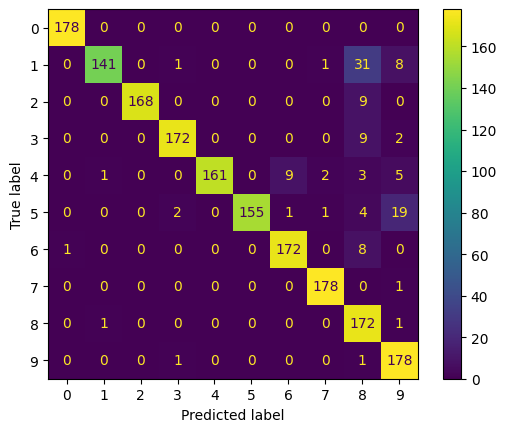

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y, predictions)

In [19]:
# Visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def plot_2d(matrix, colors):
    """
    Projecting along the first two principal components (having largest eigenvalue)
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(matrix)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, marker='.')

def plot_tsne(matrix, colors):
    """
    Non-linear projection called t-distributed stochastic neighbor embedding (t-SNE).
    """
    tsne = TSNE(init='pca')
    X_tsne = tsne.fit_transform(matrix)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, marker='.')

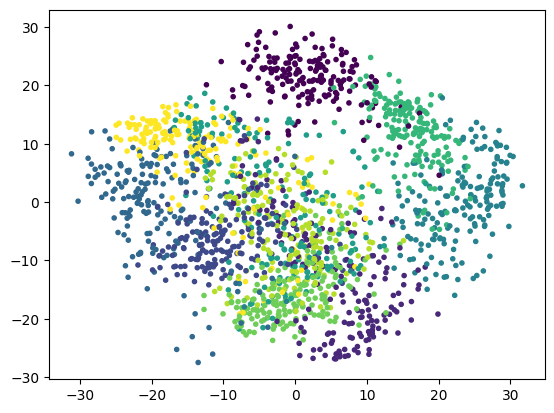

In [20]:
plot_2d(X, y)

/home/jj/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jj/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


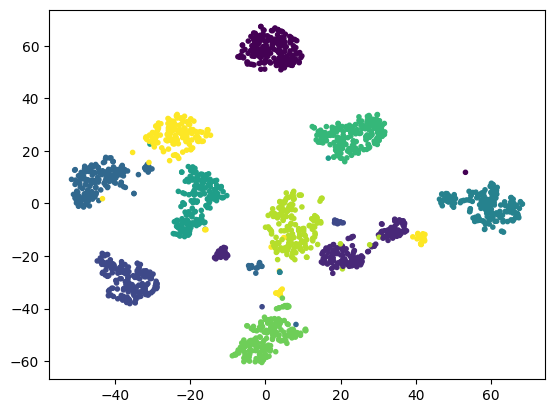

In [21]:
plot_tsne(X_numpy, y)  # Colors are just there for visualization, not for learning those low-dim embeddings